## 1. WESAD baza: značilke signalov in prepoznavanje stanj



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import os
import sys
module = os.path.abspath('D:\\P_DEV_PYTHON\\PROJECTS\\wesad_experiments\\src\\main')
# module = os.path.abspath('/home/learner/wesad_experiments/src/main')
# module = os.path.abspath("C:/Users\\18145\\development\\wesad_experiments\\src\\main")
if module not in sys.path:
    sys.path.append(module)
from DataManager import DataManager


In [27]:
# Spremenljivka za podatkovni manager
# Ta nalozi samo podatke za chest senzor
manager = DataManager()
print(manager.BASELINE_DATA)

# Nalozimo podatke ene izbrane osebe 2..17 
# metoda vrne 3 dictionaries podatkov za base, stress, amusement
# return base, stress, amusement
oseba = 3
data1 = manager.load(oseba) # load subject two data in two dicts, baseline and stress


[{'ACC': array([[ 0.89139998, -0.11019999, -0.25760001],
       [ 0.89260006, -0.10860002, -0.25440001],
       [ 0.89300001, -0.10939997, -0.25800002],
       ...,
       [ 0.71459997,  0.06420004, -0.07260001],
       [ 0.72440004,  0.06060004, -0.08179998],
       [ 0.72819996,  0.05060005, -0.0948    ]]), 'EDA': array([[5.71098328],
       [5.71937561],
       [5.70640564],
       ...,
       [1.20010376],
       [1.19094849],
       [1.19895935]]), 'Temp': array([[29.083618],
       [29.122437],
       [29.115234],
       ...,
       [29.715027],
       [29.717896],
       [29.717896]], dtype=float32)}, {'ACC': array([[ 0.78659999, -0.05980003,  0.50479996],
       [ 0.79100001, -0.06160003,  0.50479996],
       [ 0.79299998, -0.06260002,  0.50179994],
       ...,
       [ 0.85220003, -0.0194    , -0.3592    ],
       [ 0.85099995, -0.01980001, -0.3574    ],
       [ 0.85099995, -0.01899999, -0.35619998]]), 'EDA': array([[7.2227478 ],
       [7.22427368],
       [7.2227478 ],
    

In [28]:
# V data1 so trije podatki: za baseline stanje, stress in amusement
BASE = 0
STRESS = 1
AMUSEMENT = 2

# Poglejmo slovar za stres:
data1[STRESS]


{'ACC': array([[ 0.8872    ,  0.06700003,  0.074     ],
        [ 0.88820004,  0.06900001,  0.06579995],
        [ 0.89139998,  0.06819999,  0.06159997],
        ...,
        [ 0.91659999,  0.02499998, -0.0248    ],
        [ 0.91540003,  0.02520001, -0.01980001],
        [ 0.91499996,  0.02359998, -0.01660001]]),
 'EDA': array([[6.88705444],
        [6.88667297],
        [6.88476562],
        ...,
        [7.37342834],
        [7.37876892],
        [7.37419128]]),
 'Temp': array([[32.025574],
        [32.016663],
        [32.003357],
        ...,
        [31.924744],
        [31.93512 ],
        [31.942505]], dtype=float32)}

In [29]:
# Izpišimo število vzorcev senzorjev
print('Acceleration vzorci: ', data1[STRESS]['ACC'].shape)
print('Temperatura vzorci: ', data1[STRESS]['Temp'].shape)
print('Temperatura vzorci: ', data1[BASE]['Temp'].shape)


Acceleration vzorci:  (448000, 3)
Temperatura vzorci:  (448000, 1)
Temperatura vzorci:  (798000, 1)


In [30]:
# Primer izračuna značilk za temperaturo (baseline)
temp = data1[BASE]['Temp']

window_size = 42000
window_shift = 175
max_temp = []
min_temp = []
dynamic_range_temp = []
for i in range(0,len(temp) - window_size,window_shift):
    window = temp[i:window_size + i]
    max_temp.append(np.amax(window))
    min_temp.append(np.amin(window))
    dynamic_range_temp.append(max_temp[-1] - min_temp[-1]) 


In [31]:
# Izpišimo nekaj vrednosti
print(max_temp[0:5])
print(min_temp[0:5])
print(dynamic_range_temp[0:5])


[np.float32(33.20334), np.float32(33.20334), np.float32(33.20334), np.float32(33.171722), np.float32(33.171722)]
[np.float32(32.10724), np.float32(32.10724), np.float32(32.10724), np.float32(32.10724), np.float32(32.10724)]
[np.float32(1.0960999), np.float32(1.0960999), np.float32(1.0960999), np.float32(1.0644836), np.float32(1.0644836)]


In [32]:
# Izberi subjekte
#manager.SUBJECTS = [2,3,4,5,6,7,8,9,10]
manager.SUBJECTS = [2,3,4,5]
print(manager.SUBJECTS)

# Izberi senzorje : ['ACC','ECG','EDA','EMG','Resp','Temp']
manager.RAW_SENSOR_VALUES = ['ACC', 'EDA', 'Temp']

print(manager.RAW_SENSOR_VALUES)

# Nalozi podatke vseh izbranih subjektov
#print("Preparing data for model creation..")
manager.load_all(subjects=manager.SUBJECTS)


[2, 3, 4, 5]
['ACC', 'EDA', 'Temp']
Loading data for S2
['ACC', 'EDA', 'Temp']
Loading data for S3
['ACC', 'EDA', 'Temp']
Loading data for S4
['ACC', 'EDA', 'Temp']
Loading data for S5
['ACC', 'EDA', 'Temp']


In [33]:
# To je seznam, več slovarjev za vsako osebo, za BASELINE stanje
print(DataManager.BASELINE_DATA[0])



{'ACC': array([[ 0.89139998, -0.11019999, -0.25760001],
       [ 0.89260006, -0.10860002, -0.25440001],
       [ 0.89300001, -0.10939997, -0.25800002],
       ...,
       [ 0.71459997,  0.06420004, -0.07260001],
       [ 0.72440004,  0.06060004, -0.08179998],
       [ 0.72819996,  0.05060005, -0.0948    ]]), 'EDA': array([[5.71098328],
       [5.71937561],
       [5.70640564],
       ...,
       [1.20010376],
       [1.19094849],
       [1.19895935]]), 'Temp': array([[29.083618],
       [29.122437],
       [29.115234],
       ...,
       [29.715027],
       [29.717896],
       [29.717896]], dtype=float32)}


In [34]:
# To je seznam, več slovarjev za vsako osebo, za BASELINE stanje
print(DataManager.BASELINE_DATA[0])


{'ACC': array([[ 0.89139998, -0.11019999, -0.25760001],
       [ 0.89260006, -0.10860002, -0.25440001],
       [ 0.89300001, -0.10939997, -0.25800002],
       ...,
       [ 0.71459997,  0.06420004, -0.07260001],
       [ 0.72440004,  0.06060004, -0.08179998],
       [ 0.72819996,  0.05060005, -0.0948    ]]), 'EDA': array([[5.71098328],
       [5.71937561],
       [5.70640564],
       ...,
       [1.20010376],
       [1.19094849],
       [1.19895935]]), 'Temp': array([[29.083618],
       [29.122437],
       [29.115234],
       ...,
       [29.715027],
       [29.717896],
       [29.717896]], dtype=float32)}


In [35]:
from Features2 import decompose_eda, make_target, ACC_features, MSRS, Detect_peaks_ECG, SCRL, EMG

BASE = 0
STRESS = 1
AMUSEMENT = 2

numb_of_measures_4_HZ = 21864   #data_new[b'signal'][b'wrist'][b'EDA'].shape[0]
window_size_ts = 5
number_o_in_0_25_sec = 175
window_size_o =  number_o_in_0_25_sec * 4 * window_size_ts 
timestep_re = numb_of_measures_4_HZ * 0.25/3826200.0

manager.RAW_SENSOR_VALUES = ['ACC', 'Temp' ] #, 'EDA', 'Temp']

data = []

TRAIN_SUBJECTS = [2,3,4,5]

person_ind = 0
# Preko vseh oseb
for subject in TRAIN_SUBJECTS:

    person_ind = subject - 2

    print('++++++++++++++++++++++      Znacilke oseba stev. ', person_ind, ' SUBJECT ', subject  )
#for person in [0]:
    person_feat = pd.DataFrame()
    #for sensor in manager.RAW_SENSOR_VALUES:

# ACC_Chest
    # ACC = data_new[b'signal'][b'chest'][b'ACC']
    sensor = 'ACC'
    data_stres = manager.STRESS_DATA[person_ind][sensor]
    num_samples = data_stres.shape[0]
    print('STRES:    Person:', person_ind, 'Sensor: ', sensor, ' Num_Samples: ', data_stres.shape)
    data_base = manager.BASELINE_DATA[person_ind][sensor]
    num_samples = data_base.shape[0]
    print('BASELINE: Person:', person_ind, 'Sensor: ', sensor, ' Num_Samples: ', data_base.shape)

    ACC_stres = pd.DataFrame(ACC_features( data_stres, window_size_o,number_o_in_0_25_sec,timestep_re,'_chest'))
    ACC_base = pd.DataFrame(ACC_features( data_base, window_size_o,number_o_in_0_25_sec,timestep_re,'_chest'))
    ACC_feat = pd.concat([ACC_base, ACC_stres], axis=0)
    print('ACC_stres : ', ACC_stres.shape)
    print('ACC_base  : ', ACC_base.shape)

# if 1 : 
    sensor = 'EDA'
    data_s = manager.STRESS_DATA[person_ind][sensor]
    data_b = manager.BASELINE_DATA[person_ind][sensor]
    #EDA_chest
    EDA_stres = pd.DataFrame(MSRS(data_s,'EDA_chest',700))
    EDA_base = pd.DataFrame(MSRS(data_b,'EDA_chest',700))
    

# Temperatura
    #if sensor == 'Temp':
    sensor = 'Temp'
    data_stres = manager.STRESS_DATA[person_ind][sensor]
    data_base = manager.BASELINE_DATA[person_ind][sensor]
    print('STRES:    Person:', person_ind, 'Sensor: ', sensor, ' Num_Samples: ', data_stres.shape)
    print('BASELINE: Person:', person_ind, 'Sensor: ', sensor, ' Num_Samples: ', data_base.shape)

    Temp_stres = pd.DataFrame(MSRS(data_stres,'Temp_chest', 700))
    Temp_base = pd.DataFrame(MSRS(data_base,'Temp_chest', 700))
    print('Temp_stres : ', Temp_stres.shape)
    print('Temp_base  : ', Temp_base.shape)
    Temp_feat = pd.concat([Temp_base, Temp_stres], axis=0)

    #person_base = pd.concat([person_baseline, Temp_base], axis=1)

    # ZNACILKE ENE OSEBE : zdruzi po stolpcih
    person_feat_base = pd.concat([ACC_base, Temp_base, EDA_base], axis=1)
    person_feat_base['Label'] = BASE
    person_feat_base['Person'] = subject

    person_feat_stres = pd.concat([ACC_stres, Temp_stres, EDA_stres], axis=1)
    person_feat_stres['Label'] = STRESS
    person_feat_stres['Person'] = subject

    person_feat = pd.concat([person_feat_base, person_feat_stres], axis=0)
    print('-------- person_feat : ', person_feat.shape)

    # DROP NAN
    #nanloc = person_feat['mean_Temp_chest'].notna()
    person_feat.dropna(axis = 0, inplace=True)
    #person_feat.info()

    if person_ind==0:
        data = person_feat
    else:
        data = pd.concat([data, person_feat])

    #print(ACC_data_chest.head())
    print('+++++++++++   data : ', data.shape)
    person_ind = person_ind + 1

data.info()


++++++++++++++++++++++      Znacilke oseba stev.  0  SUBJECT  2
STRES:    Person: 0 Sensor:  ACC  Num_Samples:  (430500, 3)
BASELINE: Person: 0 Sensor:  ACC  Num_Samples:  (800800, 3)
ACC_stres :  (2440, 15)
ACC_base  :  (4556, 15)
MSRS: Lenght :  430500 nsampl :  2220
MSRS: Lenght :  800800 nsampl :  4336
STRES:    Person: 0 Sensor:  Temp  Num_Samples:  (430500, 1)
BASELINE: Person: 0 Sensor:  Temp  Num_Samples:  (800800, 1)
MSRS: Lenght :  430500 nsampl :  2220
MSRS: Lenght :  800800 nsampl :  4336
Temp_stres :  (2220, 4)
Temp_base  :  (4336, 4)
-------- person_feat :  (6996, 25)
+++++++++++   data :  (6556, 25)
++++++++++++++++++++++      Znacilke oseba stev.  1  SUBJECT  3
STRES:    Person: 1 Sensor:  ACC  Num_Samples:  (448000, 3)
BASELINE: Person: 1 Sensor:  ACC  Num_Samples:  (798000, 3)
ACC_stres :  (2540, 15)
ACC_base  :  (4540, 15)
MSRS: Lenght :  448000 nsampl :  2320


c:\Users\user\Documents\GitHub\Faks FRI\UPK\uporabniku-prilagojena-komunikacija\LV4\LV04-05 Gradiva-20241113\Features2.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  dynamic_range[i] = 20*np.log10(data[start:end+1].max()/data[start:end+1].min())


MSRS: Lenght :  798000 nsampl :  4320
STRES:    Person: 1 Sensor:  Temp  Num_Samples:  (448000, 1)
BASELINE: Person: 1 Sensor:  Temp  Num_Samples:  (798000, 1)
MSRS: Lenght :  448000 nsampl :  2320


c:\Users\user\Documents\GitHub\Faks FRI\UPK\uporabniku-prilagojena-komunikacija\LV4\LV04-05 Gradiva-20241113\Features2.py:39: RuntimeWarning: invalid value encountered in log10
  dynamic_range[i] = 20*np.log10(data[start:end+1].max()/data[start:end+1].min())


MSRS: Lenght :  798000 nsampl :  4320
Temp_stres :  (2320, 4)
Temp_base  :  (4320, 4)
-------- person_feat :  (7080, 25)
+++++++++++   data :  (12955, 25)
++++++++++++++++++++++      Znacilke oseba stev.  2  SUBJECT  4
STRES:    Person: 2 Sensor:  ACC  Num_Samples:  (444500, 3)
BASELINE: Person: 2 Sensor:  ACC  Num_Samples:  (810601, 3)
ACC_stres :  (2520, 15)
ACC_base  :  (4613, 15)
MSRS: Lenght :  444500 nsampl :  2300
MSRS: Lenght :  810601 nsampl :  4392
STRES:    Person: 2 Sensor:  Temp  Num_Samples:  (444500, 1)
BASELINE: Person: 2 Sensor:  Temp  Num_Samples:  (810601, 1)
MSRS: Lenght :  444500 nsampl :  2300
MSRS: Lenght :  810601 nsampl :  4392
Temp_stres :  (2300, 4)
Temp_base  :  (4392, 4)
-------- person_feat :  (7133, 25)
+++++++++++   data :  (19647, 25)
++++++++++++++++++++++      Znacilke oseba stev.  3  SUBJECT  5
STRES:    Person: 3 Sensor:  ACC  Num_Samples:  (451500, 3)
BASELINE: Person: 3 Sensor:  ACC  Num_Samples:  (838600, 3)
ACC_stres :  (2560, 15)
ACC_base  :  (

In [36]:
data.describe()

,ACC_X_mean_chest,ACC_Y_mean_chest,ACC_Z_mean_chest,ACC_X_std_chest,ACC_Y_std_chest,ACC_Z_std_chest,ACC_X_max_chest,ACC_Y_max_chest,ACC_Z_max_chest,ACC_X_iabs_chest,...,mean_Temp_chest,std_Temp_chest,dynamic_range_Temp_chest,slope_Temp_chest,mean_EDA_chest,std_EDA_chest,dynamic_range_EDA_chest,slope_EDA_chest,Label,Person
count,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,...,26539.000000,26539.000000,26539.000000,2.653900e+04,26539.000000,26539.000000,26539.000000,2.653900e+04,26539.000000,26539.000000
mean,0.805170,-0.113552,-0.366697,0.007737,0.009301,0.013988,0.834029,0.150178,0.419825,4.024698,...,32.328989,0.074738,0.137611,6.368575e-07,4.387819,0.103344,1.624176,-7.708550e-07,0.336825,3.524511
std,0.099766,0.151216,0.214086,0.007890,0.011365,0.019365,0.112902,0.148124,0.189294,0.498689,...,2.048556,0.175455,0.143331,1.312059e-05,2.890391,0.178007,0.962708,1.231524e-05,0.472633,1.123788
min,0.608975,-0.554888,-0.729365,0.002147,0.001955,0.003597,0.623000,0.007600,0.042200,3.044004,...,28.201796,0.014438,0.057615,-1.046797e-04,1.110008,0.009285,0.226980,-9.311494e-05,0.000000,2.000000
25%,0.717431,-0.114771,-0.457626,0.003935,0.003002,0.005978,0.734600,0.058200,0.289800,3.586132,...,31.197312,0.025567,0.089802,-1.289368e-06,1.394137,0.017183,0.854576,-3.278823e-06,0.000000,3.000000
50%,0.836171,-0.062305,-0.395661,0.005457,0.005304,0.009835,0.850200,0.087000,0.431800,4.179667,...,32.749233,0.034608,0.111204,3.204346e-07,3.738250,0.036274,1.445097,-4.268828e-07,0.000000,4.000000
75%,0.896870,-0.030963,-0.194833,0.008859,0.010344,0.016226,0.930600,0.156800,0.491000,4.483069,...,34.450588,0.057939,0.138485,1.642136e-06,6.624571,0.142554,2.381090,7.266090e-07,1.000000,5.000000
max,0.916063,0.121292,0.102308,0.136457,0.163169,0.432108,1.327800,0.622200,0.870000,4.579007,...,35.192001,1.843627,1.568764,1.309357e-04,10.422114,1.799067,4.781294,1.198451e-04,1.000000,5.000000


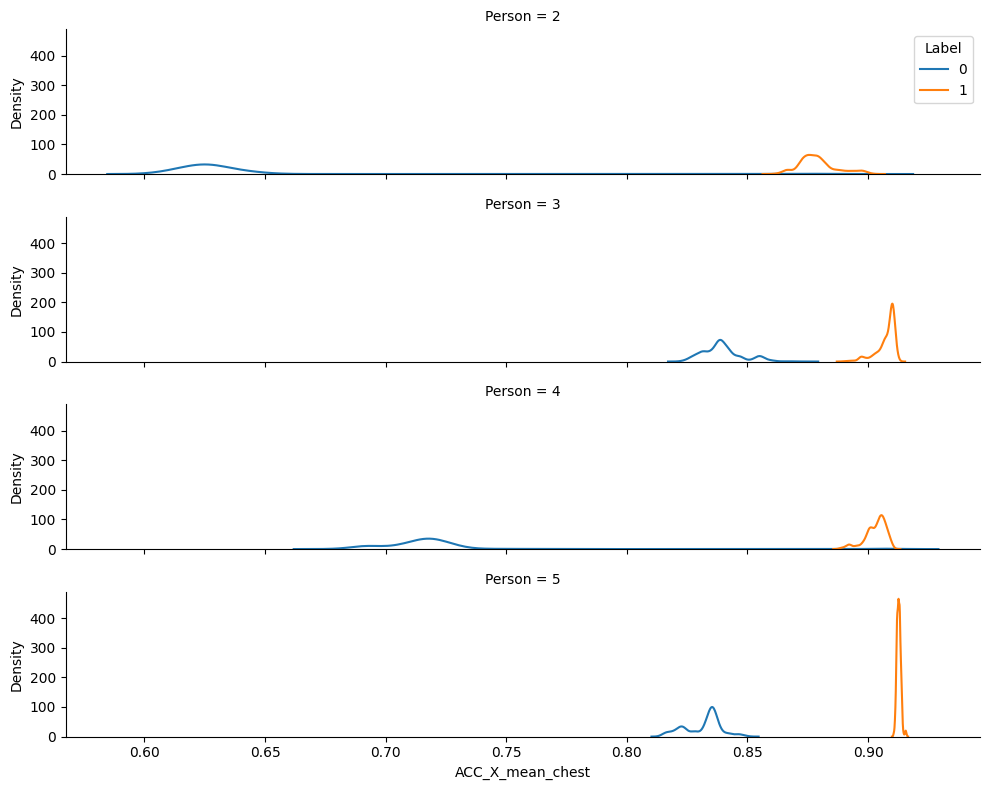

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fg1 = sns.FacetGrid(data, row='Person', hue="Label", aspect=5, legend_out=False, height=2)
fg1.map(sns.kdeplot,'ACC_X_mean_chest').add_legend()
plt.show()


(26539, 25)


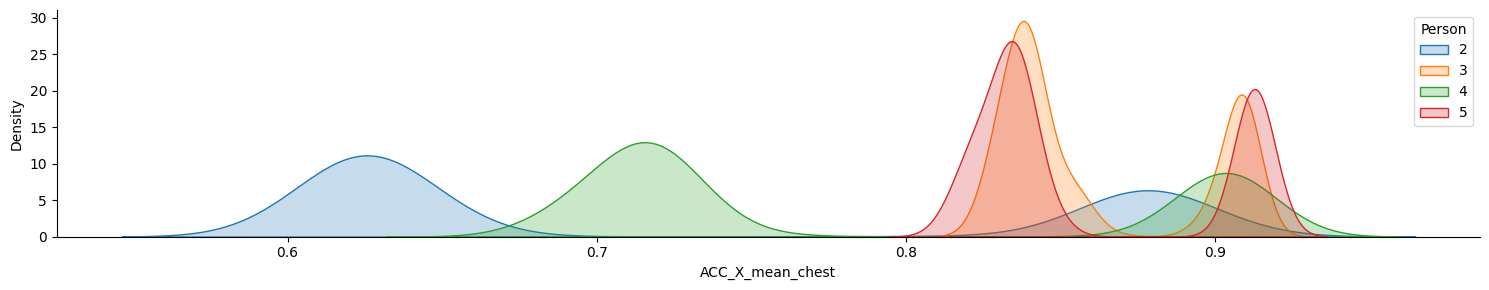

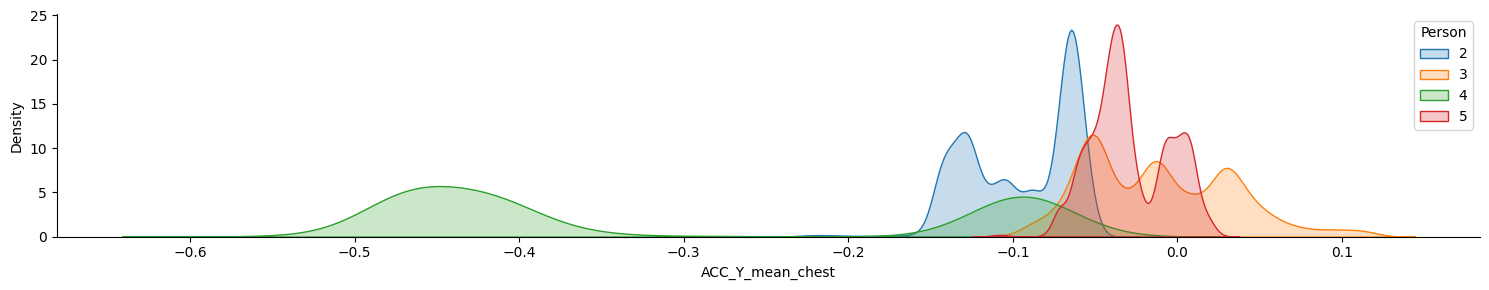

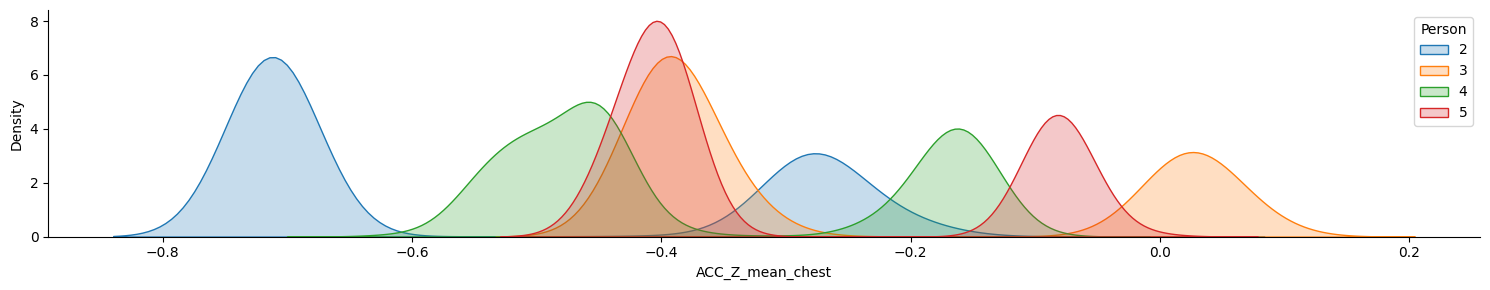

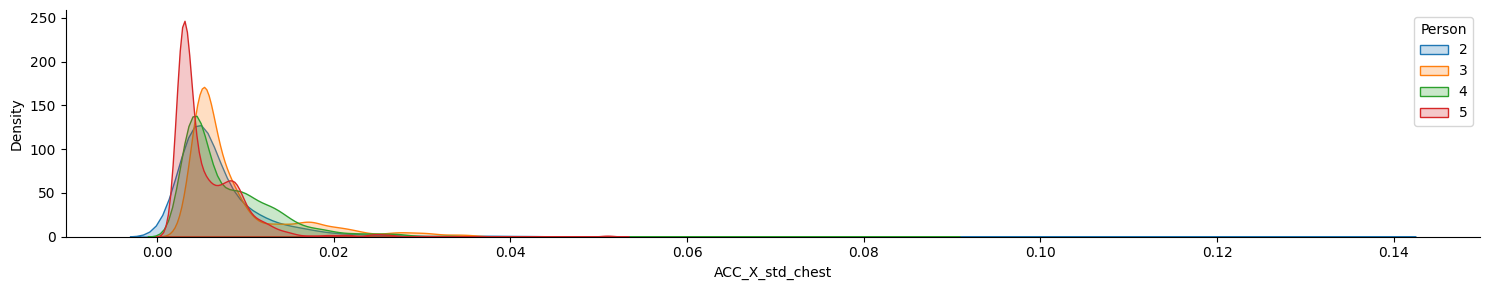

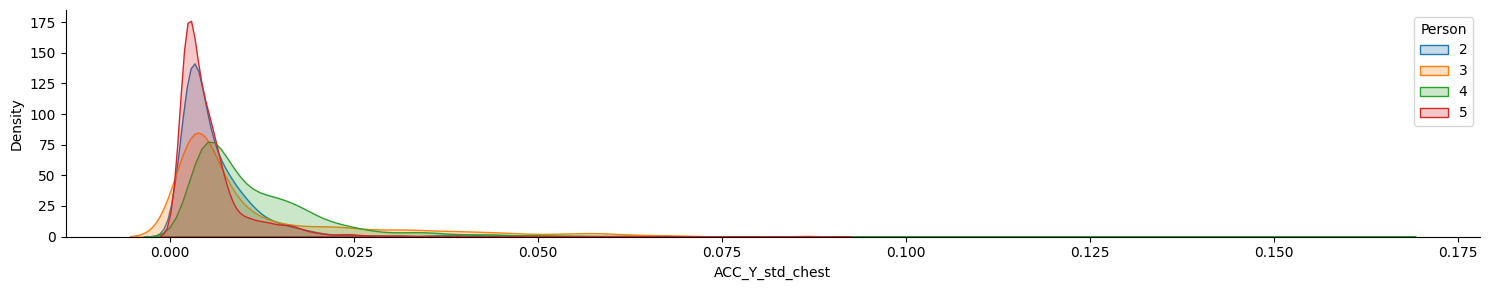

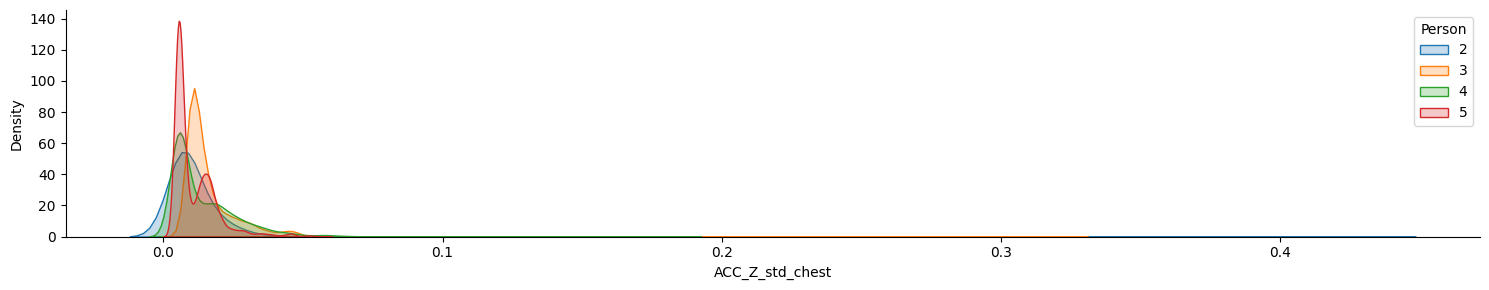

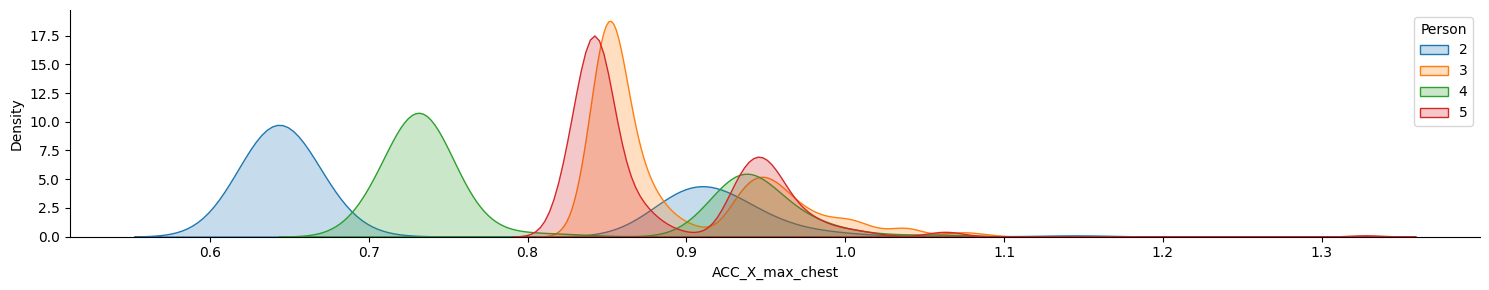

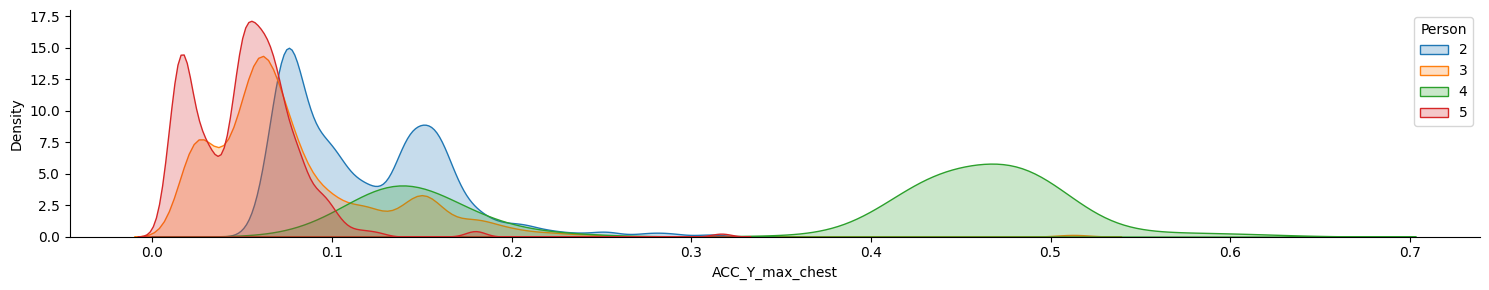

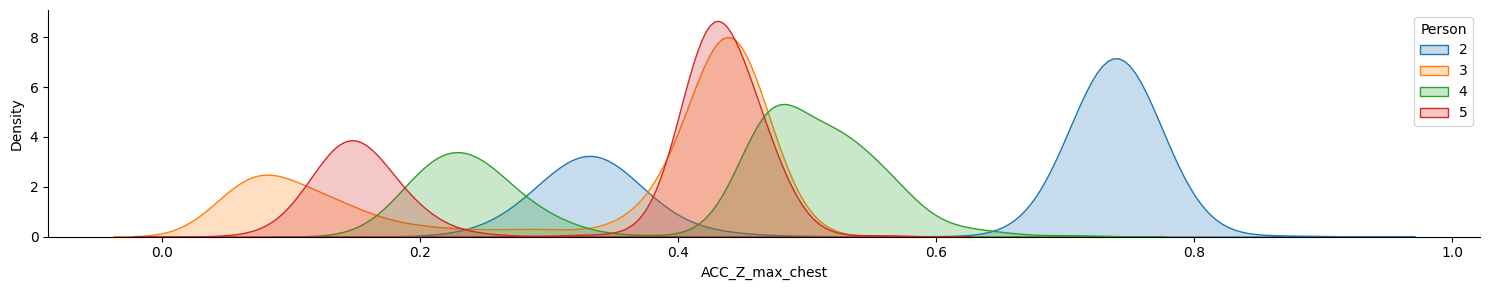

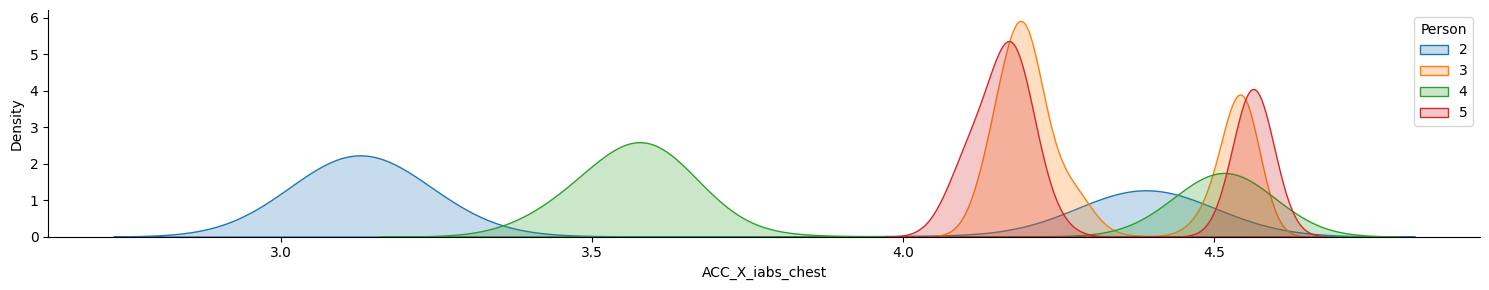

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.shape)

for col in data.columns[0:10]:

    fg = sns.FacetGrid(data, hue="Person", aspect=5, legend_out=False)
    fg.map(sns.kdeplot, col, fill=True).add_legend()
plt.show()


(26539, 25)


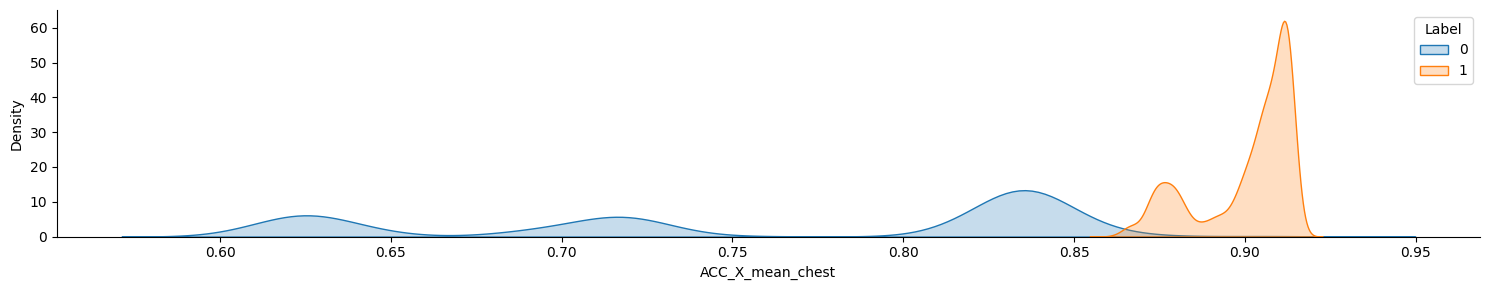

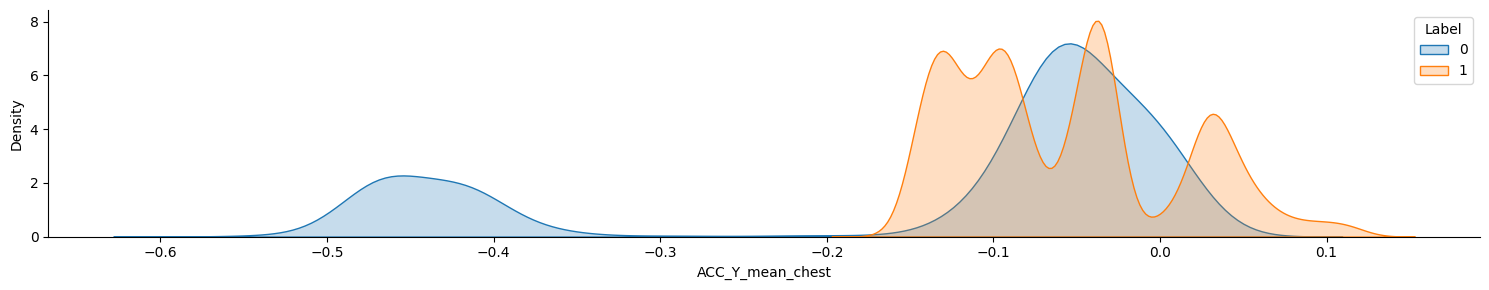

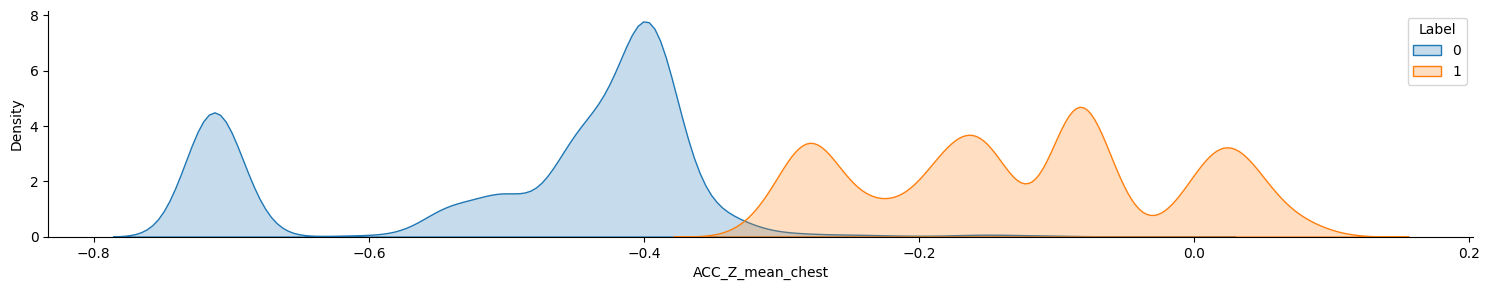

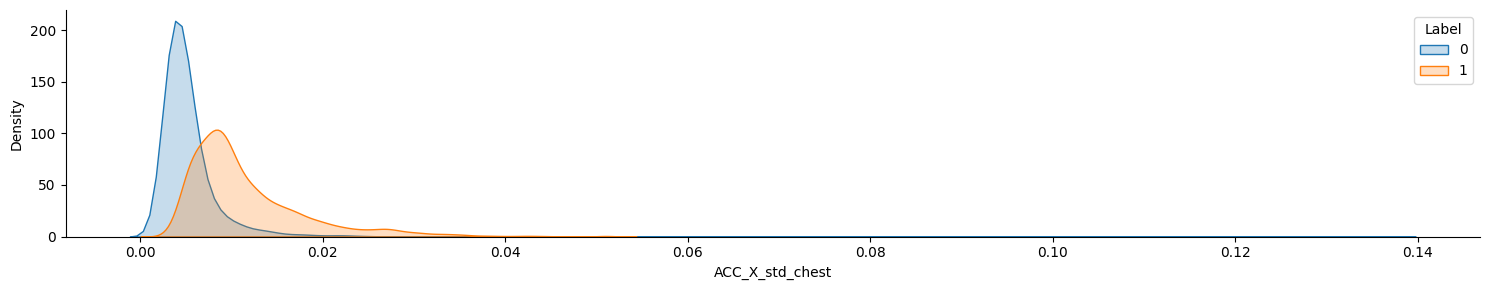

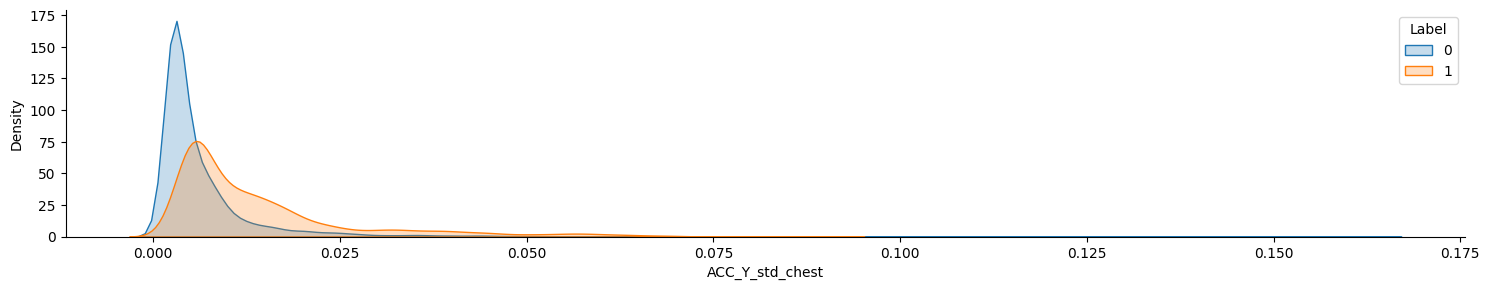

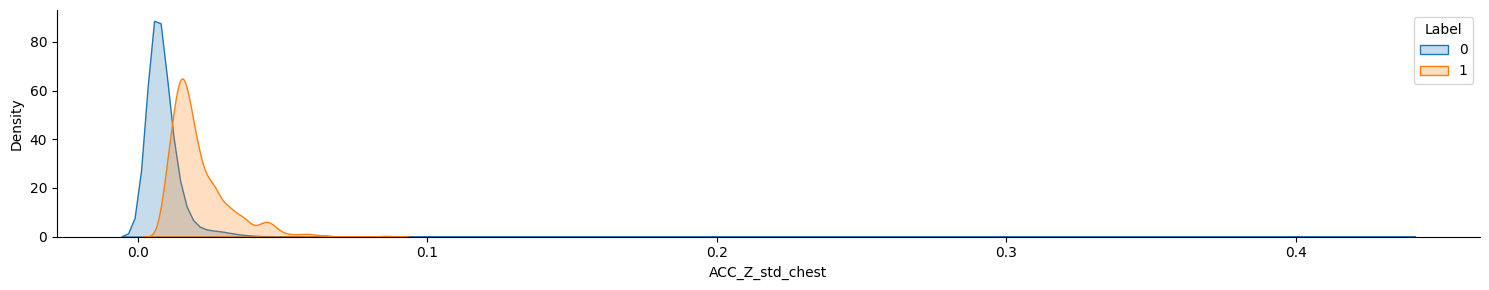

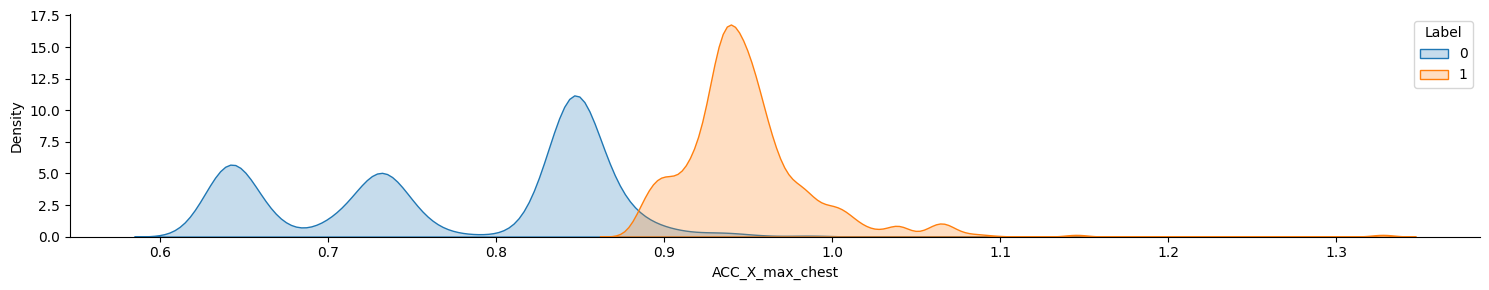

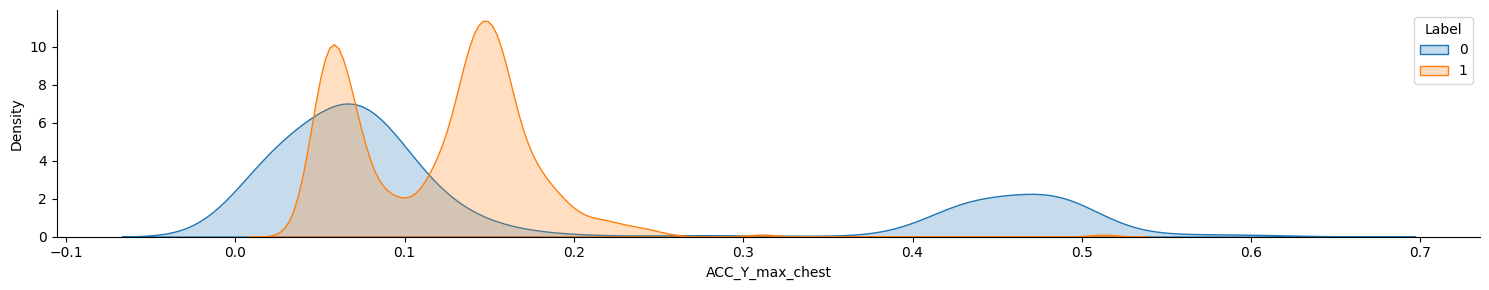

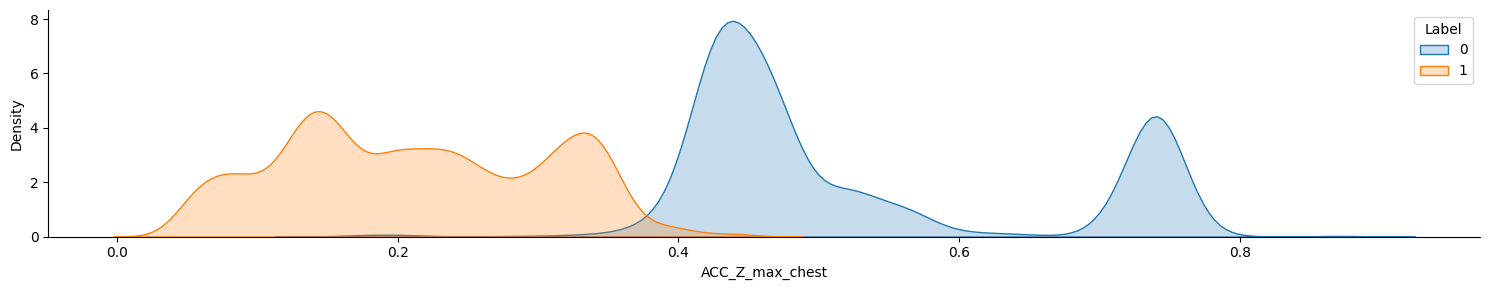

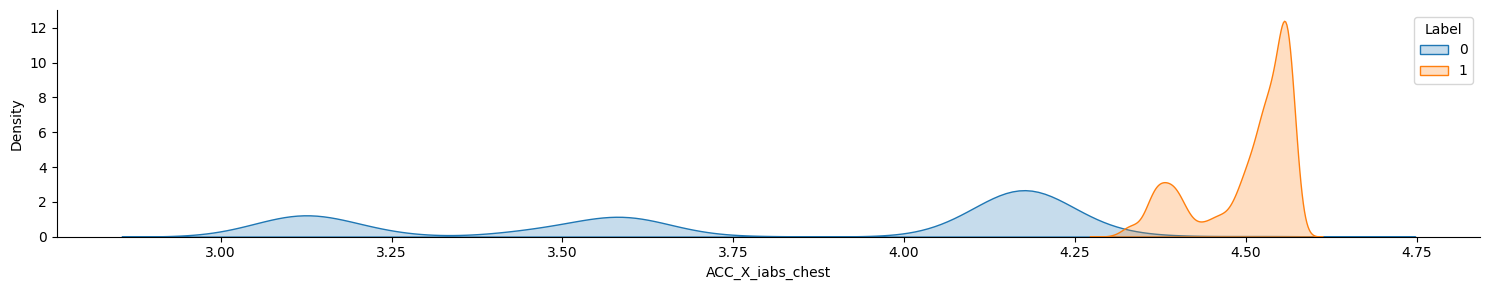

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.shape)

for col in data.columns[0:10]:

    fg = sns.FacetGrid(data, hue="Label", aspect=5, legend_out=False)
    fg.map(sns.kdeplot, col, fill=True).add_legend()
plt.show()


In [40]:
### Normalizacija podatkov
norm_data=(data - data.mean())/data.std()

norm_data['Label'] = data['Label']
norm_data['Person'] = data['Person']

norm_data.describe()


,ACC_X_mean_chest,ACC_Y_mean_chest,ACC_Z_mean_chest,ACC_X_std_chest,ACC_Y_std_chest,ACC_Z_std_chest,ACC_X_max_chest,ACC_Y_max_chest,ACC_Z_max_chest,ACC_X_iabs_chest,...,mean_Temp_chest,std_Temp_chest,dynamic_range_Temp_chest,slope_Temp_chest,mean_EDA_chest,std_EDA_chest,dynamic_range_EDA_chest,slope_EDA_chest,Label,Person
count,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,...,2.653900e+04,2.653900e+04,26539.000000,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,2.653900e+04,26539.000000,26539.000000
mean,-8.567530e-16,7.710777e-17,3.769713e-16,1.199454e-16,3.855388e-17,-9.424283e-17,3.255661e-16,2.570259e-17,-1.713506e-16,7.025375e-16,...,-1.542155e-15,3.319918e-17,0.000000,-1.285129e-17,-1.028104e-16,-3.427012e-17,-1.499318e-16,-1.070941e-17,0.336825,3.524511
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.472633,1.123788
min,-1.966539e+00,-2.918580e+00,-1.694031e+00,-7.084217e-01,-6.463524e-01,-5.365680e-01,-1.869135e+00,-9.625549e-01,-1.994911e+00,-1.966543e+00,...,-2.014684e+00,-3.436753e-01,-0.558119,-8.026813e+00,-1.134037e+00,-5.284029e-01,-1.451318e+00,-7.498357e+00,0.000000,2.000000
25%,-8.794390e-01,-8.059991e-03,-4.247296e-01,-4.817915e-01,-5.542297e-01,-4.136045e-01,-8.806689e-01,-6.209503e-01,-6.868924e-01,-8.794368e-01,...,-5.524265e-01,-2.802459e-01,-0.333556,-1.468094e-01,-1.035736e+00,-4.840333e-01,-7.994118e-01,-2.036475e-01,0.000000,3.000000
50%,3.107409e-01,3.388976e-01,-1.352922e-01,-2.889348e-01,-3.516506e-01,-2.144615e-01,1.432278e-01,-4.265191e-01,6.326363e-02,3.107539e-01,...,2.051418e-01,-2.287170e-01,-0.184238,-2.411652e-02,-2.247338e-01,-3.767822e-01,-1.860162e-01,2.793061e-02,0.000000,4.000000
75%,9.191541e-01,5.461634e-01,8.027802e-01,1.421934e-01,9.174571e-02,1.155962e-01,8.553489e-01,4.470612e-02,3.760046e-01,9.191520e-01,...,1.035656e+00,-9.574379e-02,0.006100,7.661843e-02,7.738579e-01,2.202689e-01,7.862343e-01,1.215944e-01,1.000000,5.000000
max,1.111533e+00,1.553033e+00,2.190736e+00,1.631388e+01,1.353848e+01,2.159124e+01,4.373440e+00,3.186659e+00,2.378181e+00,1.111533e+00,...,1.397576e+00,1.008171e+01,9.984972,9.930866e+00,2.087709e+00,9.526142e+00,3.279413e+00,9.794035e+00,1.000000,5.000000


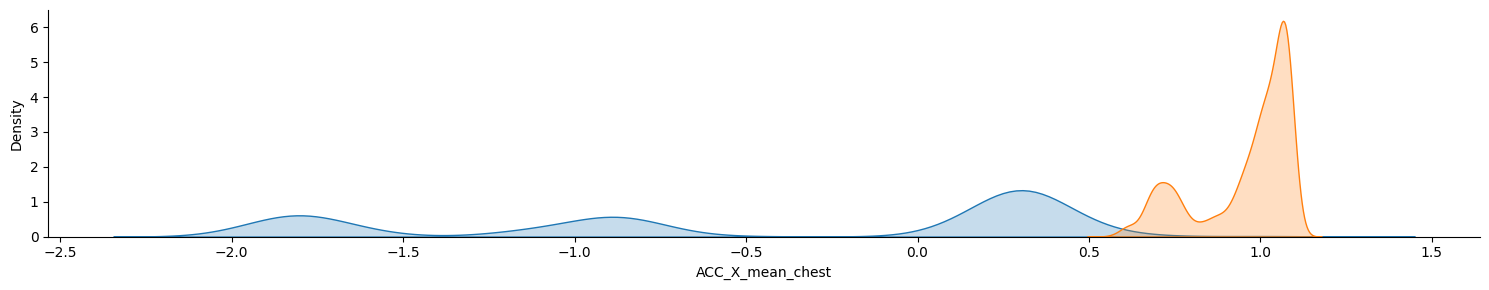

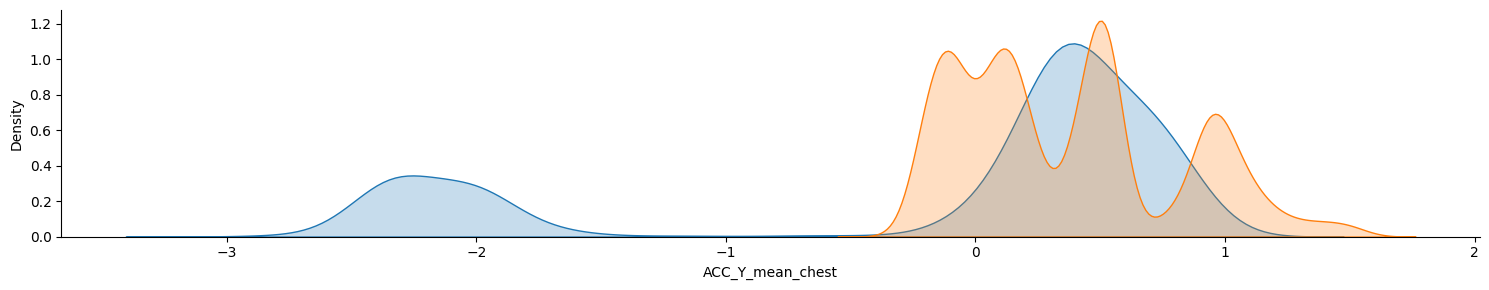

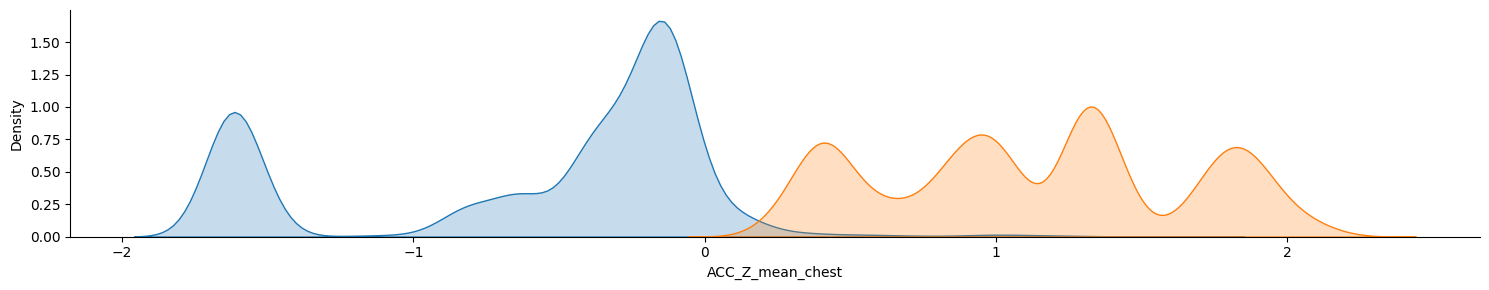

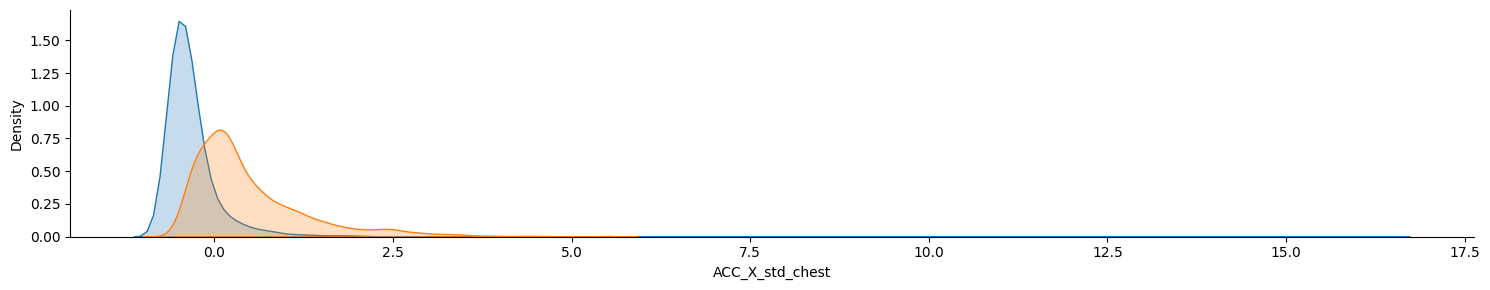

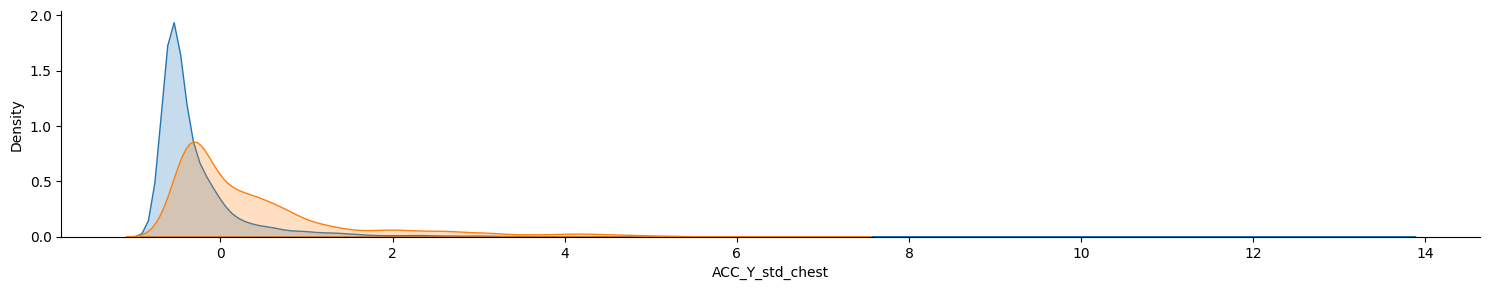

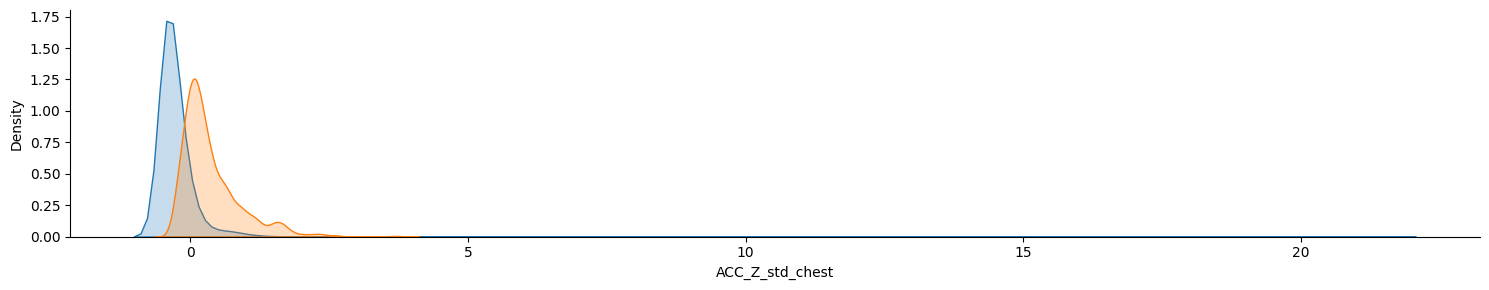

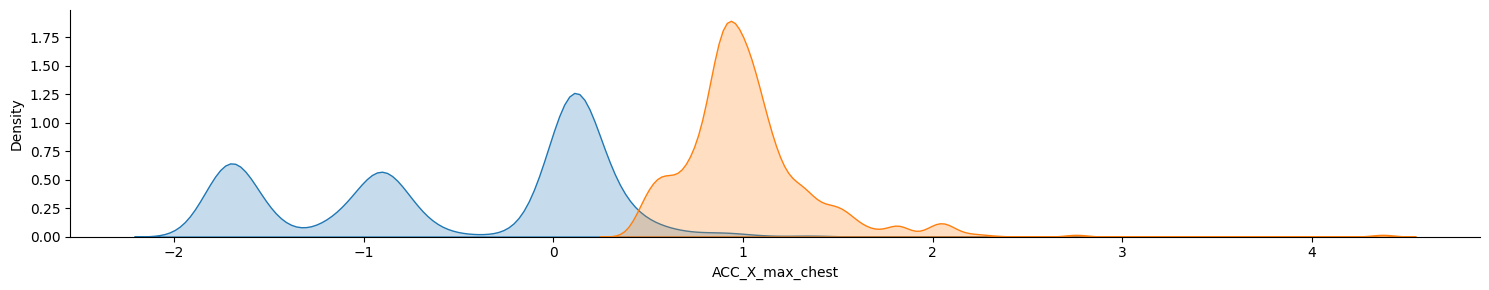

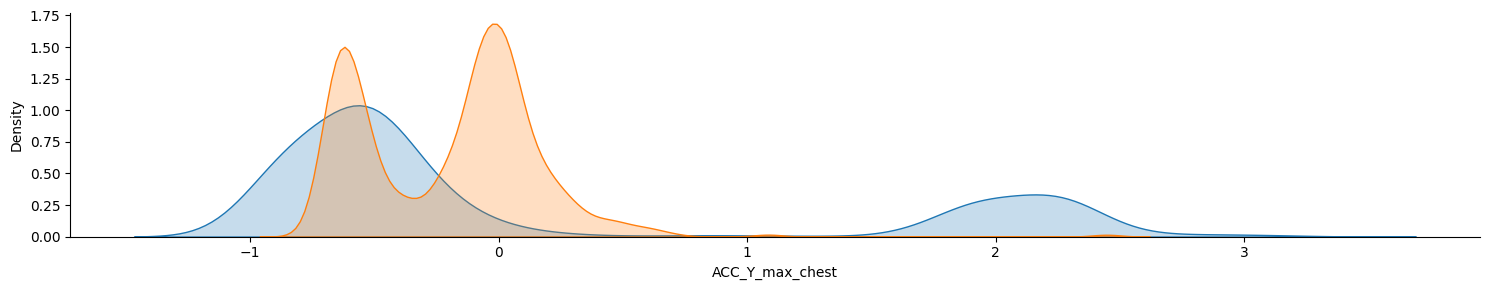

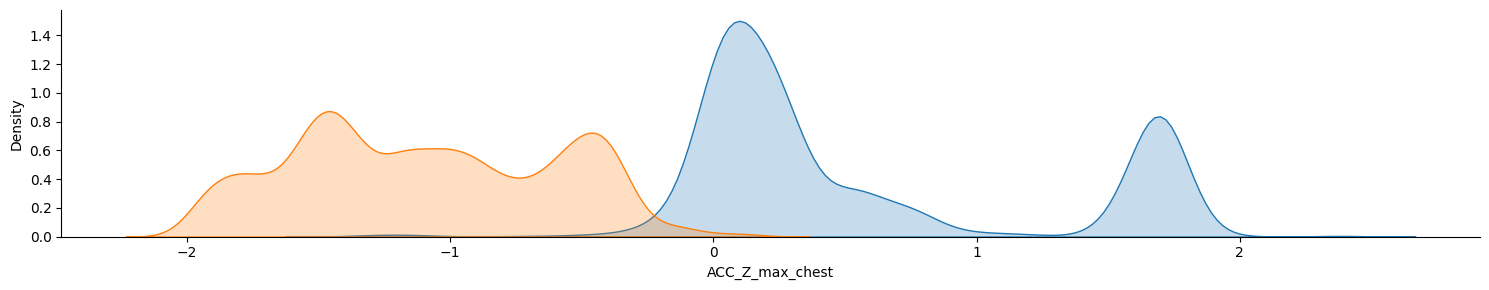

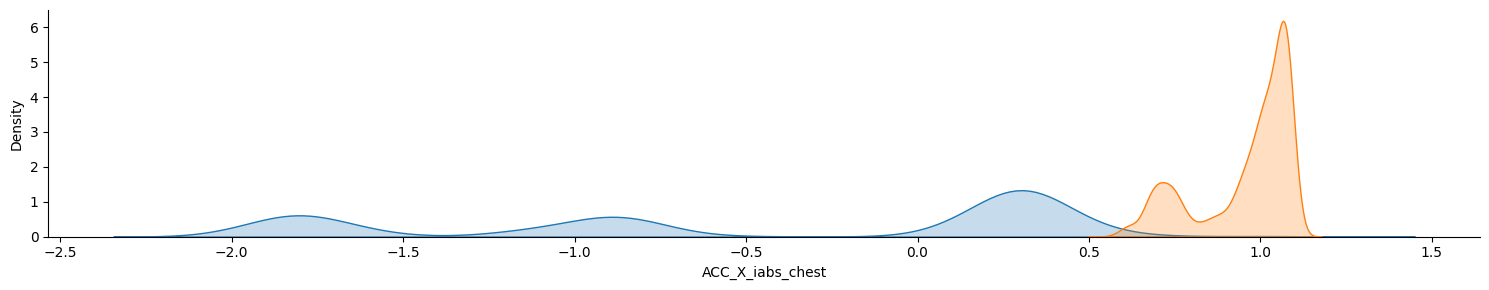

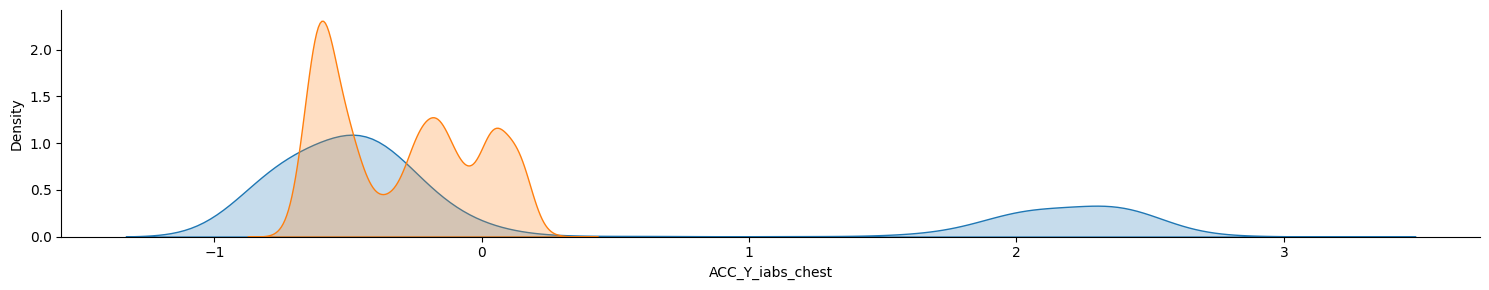

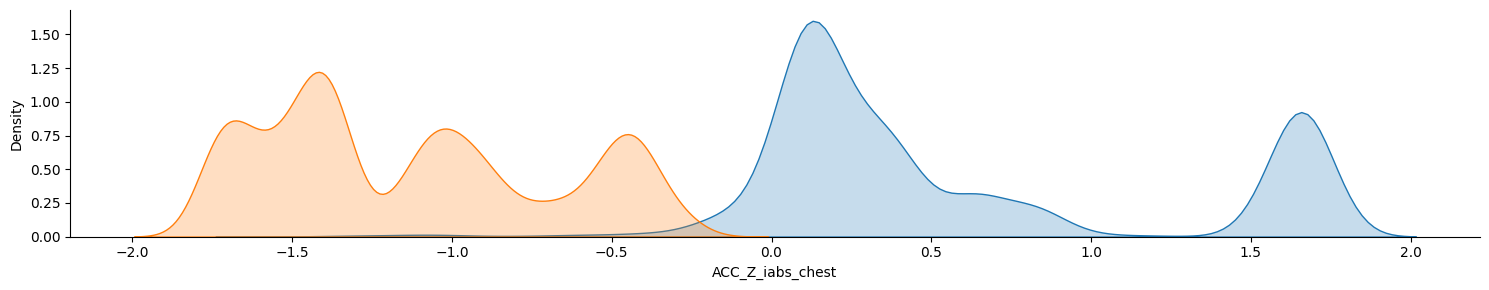

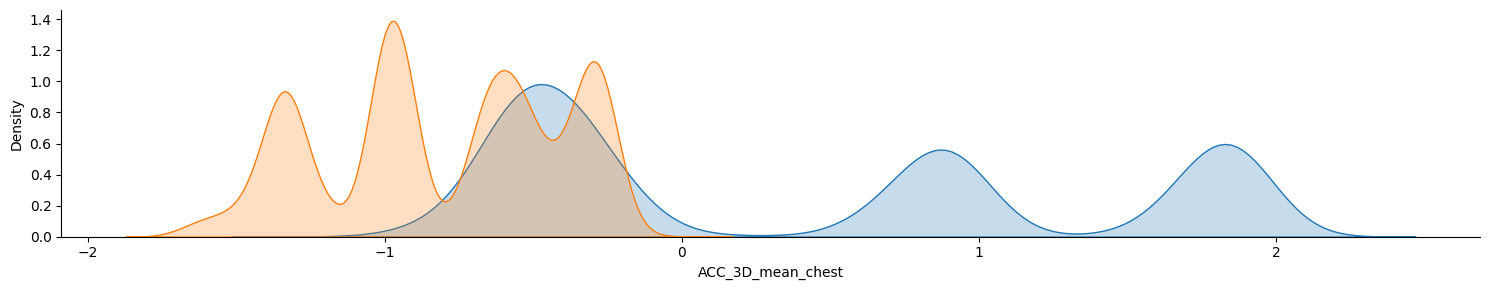

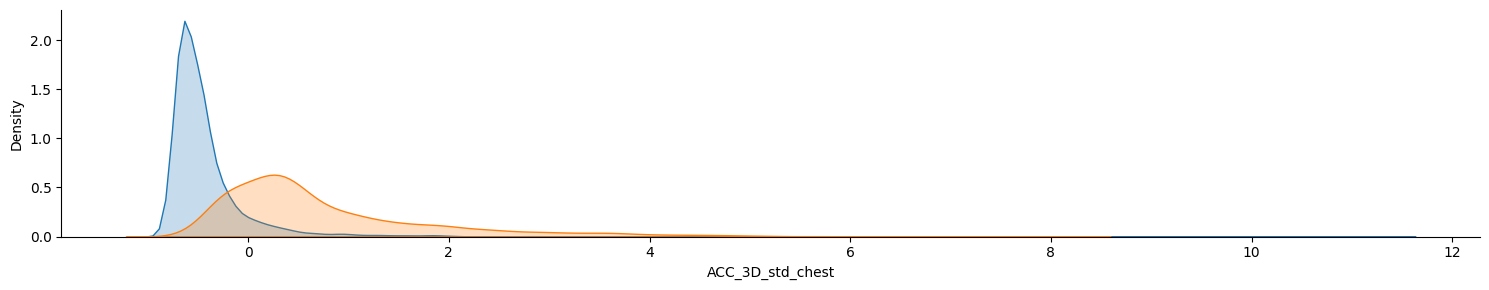

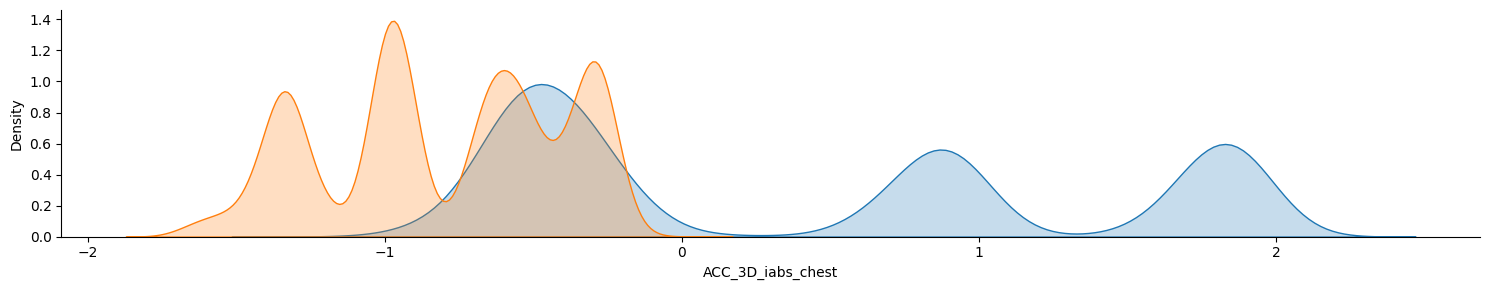

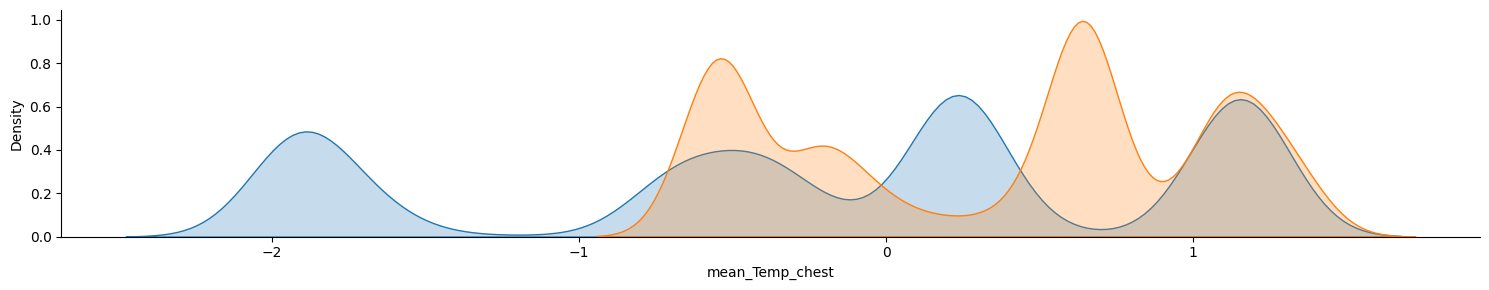

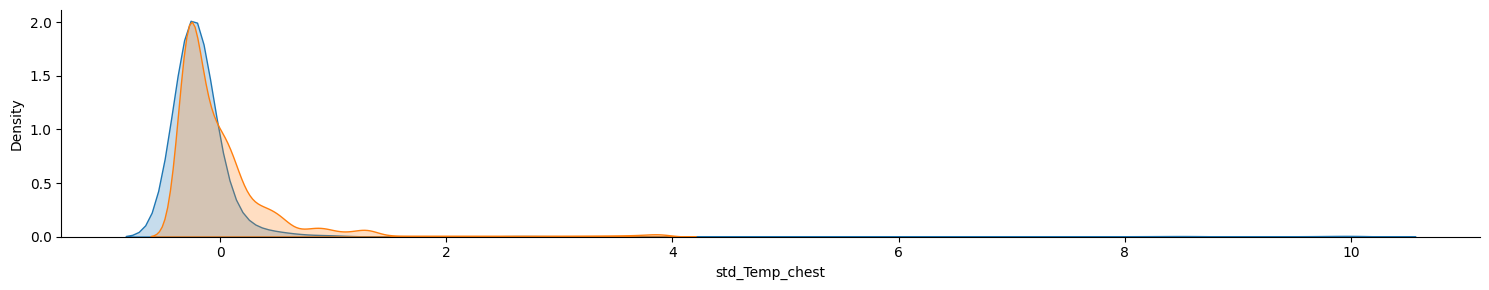

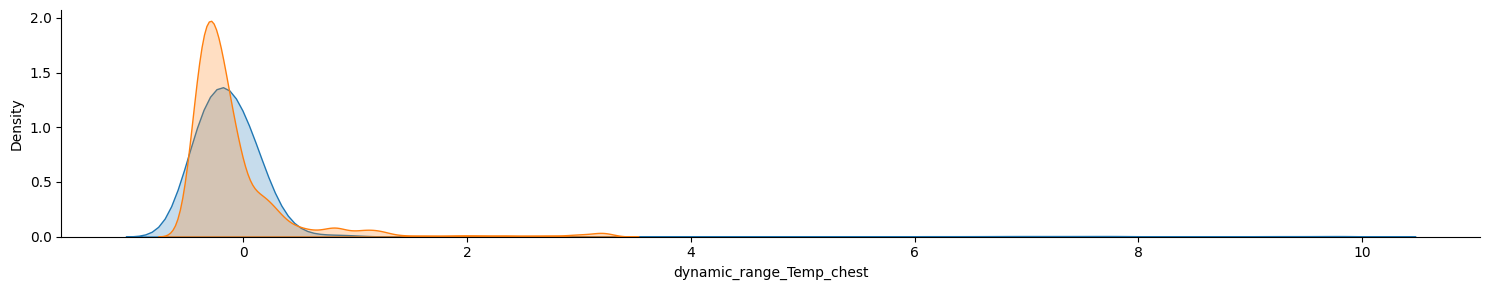

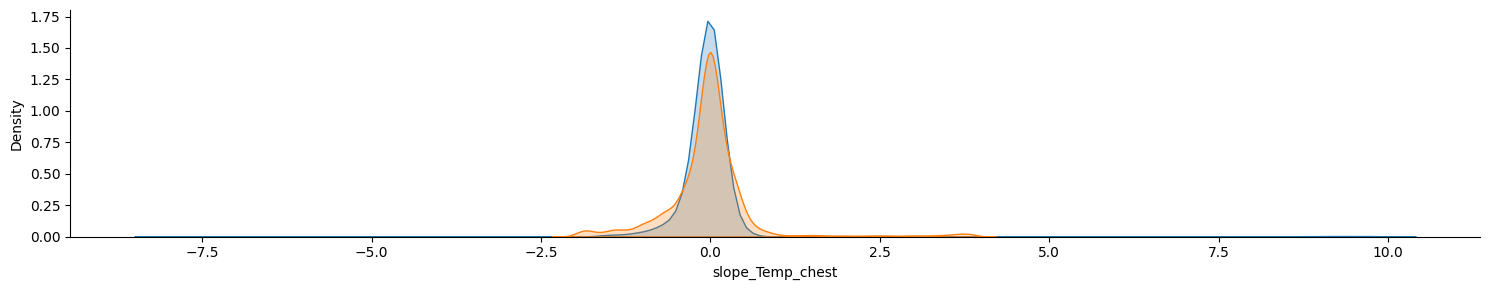

In [41]:
for col in norm_data.columns[0:19]:
    fg2 = sns.FacetGrid(norm_data, hue="Label", aspect=5)
    fg2.map(sns.kdeplot, col, fill=True)
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
# TESTNI IN UCNI SET PODATKOV

# Uporaba vseh oseb Person v train in test set.

# Oznaka razreda, labela stanja
norm_y = norm_data['Label']
data_y = data['Label']

# Features, podatki
norm_x = norm_data.drop(['Label','Person'],axis=1)
data_x = data.drop(['Label','Person'],axis=1)

norm_x.shape

# Uporaba originalnih podatkov
#x_train,x_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3)

# Uporaba normaliziranih podatkov
x_train,x_test,y_train,y_test = train_test_split(norm_x, norm_y, test_size=0.3)


In [43]:
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report


 y_train  :  (18577,)
 x_train  :  (18577, 23)
 x_test  :  (7962, 23)
              precision    recall  f1-score   support

           0     0.9996    0.9952    0.9974      5219
           1     0.9910    0.9993    0.9951      2743

    accuracy                         0.9966      7962
   macro avg     0.9953    0.9972    0.9963      7962
weighted avg     0.9966    0.9966    0.9966      7962



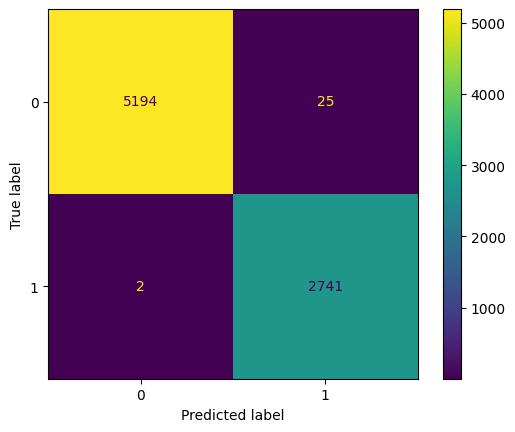

In [44]:
print(' y_train  : ', y_train.shape)
print(' x_train  : ', x_train.shape)
print(' x_test  : ', x_test.shape)

clf = skl_lm.LogisticRegression(solver='newton-cg', penalty='l2', max_iter=1000)
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))

# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_out, normalize=None))
disp.plot()


In [45]:
from sklearn.model_selection import train_test_split
# TESTNI IN UCNI SET PODATKOV

# Uporaba Izbranih Person v train in drugih v test setu
TRAIN_PERSONS = [2,3,4,5]
TEST_PERSON = 2

izbira_train = data['Person']==0

# Preko vseh TRAIN oseb
for subject in TRAIN_PERSONS:
    izbira = data['Person']==subject
    izbira_train = izbira_train | izbira

print(izbira_train)

norm_train = data[izbira_train]
norm_train.info()
#

# Izbira testne osebe
izbira_test = data['Person']==TEST_PERSON

norm_test = data[izbira_test]
norm_test.info()

# Naredi train set
y_train_data = norm_train['Label']
x_train_data = norm_train.drop(['Label','Person'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.8)

# Test set
y_test = norm_test['Label']
x_test = norm_test.drop(['Label','Person'],axis=1)


0       True
1       True
2       True
3       True
4       True
        ... 
2335    True
2336    True
2337    True
2338    True
2339    True
Name: Person, Length: 26539, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 26539 entries, 0 to 2339
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ACC_X_mean_chest          26539 non-null  float64
 1   ACC_Y_mean_chest          26539 non-null  float64
 2   ACC_Z_mean_chest          26539 non-null  float64
 3   ACC_X_std_chest           26539 non-null  float64
 4   ACC_Y_std_chest           26539 non-null  float64
 5   ACC_Z_std_chest           26539 non-null  float64
 6   ACC_X_max_chest           26539 non-null  float64
 7   ACC_Y_max_chest           26539 non-null  float64
 8   ACC_Z_max_chest           26539 non-null  float64
 9   ACC_X_iabs_chest          26539 non-null  float64
 10  ACC_Y_iabs_chest          26539 non-null  float6

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# TESTNI IN UCNI SET PODATKOV

# Uporaba Izbranih Person v train in drugih v test setu
TRAIN_PERSONS = [3, 4, 5]
TEST_PERSON = 2

izbira_train = data['Person'] == 0

# Preko vseh TRAIN oseb
for subject in TRAIN_PERSONS:
    izbira = data['Person'] == subject
    izbira_train = izbira_train | izbira

print(izbira_train)

norm_train = data[izbira_train]
norm_train.info()

# Izbira testne osebe
izbira_test = data['Person'] == TEST_PERSON

norm_test = data[izbira_test]
norm_test.info()

# Naredi train set
y_train_data = norm_train['Label']
x_train_data = norm_train.drop(['Label', 'Person'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.8)

# Test set
y_test = norm_test['Label']
x_test = norm_test.drop(['Label', 'Person'], axis=1)

# Učenje modela
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Napovedovanje
y_pred = model.predict(x_test)

# Rezultati in komentarji
print("Pravilnost razpoznave: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nPodrobno poročilo o klasifikaciji:\n")
print(classification_report(y_test, y_pred))

# Komentarji
# Pravilnost razpoznave je odvisna od več dejavnikov, vključno s kakovostjo podatkov, izbiro modela in parametrov.
# Če je pravilnost nizka, je morda potrebno izboljšati predobdelavo podatkov, izbrati boljši model ali prilagoditi parametre modela.

0       False
1       False
2       False
3       False
4       False
        ...  
2335     True
2336     True
2337     True
2338     True
2339     True
Name: Person, Length: 26539, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 19983 entries, 0 to 2339
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ACC_X_mean_chest          19983 non-null  float64
 1   ACC_Y_mean_chest          19983 non-null  float64
 2   ACC_Z_mean_chest          19983 non-null  float64
 3   ACC_X_std_chest           19983 non-null  float64
 4   ACC_Y_std_chest           19983 non-null  float64
 5   ACC_Z_std_chest           19983 non-null  float64
 6   ACC_X_max_chest           19983 non-null  float64
 7   ACC_Y_max_chest           19983 non-null  float64
 8   ACC_Z_max_chest           19983 non-null  float64
 9   ACC_X_iabs_chest          19983 non-null  float64
 10  ACC_Y_iabs_chest          19983 non-n